In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import math
import warnings
warnings.filterwarnings('ignore')

### По итогу лучший результат показал следующий алгоритм (функция segmentation)
#### Его еще можно улучшить, если убрать артефакты (точки на фото)
#### Метрика и оценка качества внизу

In [2]:
def segmentation(img):
    # Определение ядра
    kernel = np.ones((15,15), np.uint8)

     # Применение операции эрозии
    erosion = cv2.erode(img, kernel, iterations = 1)

    
    # OTSU
    ret, thresh = cv2.threshold(erosion, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    kernel = np.ones((20,20), np.uint8)

    # Применение операции градиента
    gradient = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel)
    
    gray = gradient

    # нахождение контура прямоугольника
    ret, thresh = cv2.threshold(gray, 127, 255, 0)
    _, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


    # нахождение внешних контуров
    external_contours = []
    for cnt in contours:
        if cv2.contourArea(cnt) > 15e6:  # минимальный порог площади
            external_contours.append(cnt)

    # создание бинарного изображения
    binary = np.zeros_like(img)
    cv2.drawContours(binary, external_contours, -1, (255, 255, 255), cv2.FILLED)
    
    mask = gradient - binary
    
    mask[:, :650] = 0
    mask[:200, :] = 0
    mask[binary.shape[0] - 300:, :] = 0
        

    mask[:, binary.shape[1] - 1000:] = 0
    
    # ядро для закрытия
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (100, 100))

    # закрытие
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)


    
    return mask


    

In [3]:
mypath = './camera1/'
photos = [f for f in listdir(mypath) if isfile(join(mypath, f))]
photos

['no-defects-11_30_39-12.12.2022.png',
 'no-defects-11_48_12-20.12.2022.png',
 'no-defects-06_45_22-13.12.2022.png',
 'no-defects-11_46_21-20.12.2022.png',
 'no-defects-11_46_32-20.12.2022.png',
 'no-defects-11_28_32-12.12.2022.png']

# Разметка
### тк фоток всего 12 разметка производилась вручную с помощью gimp

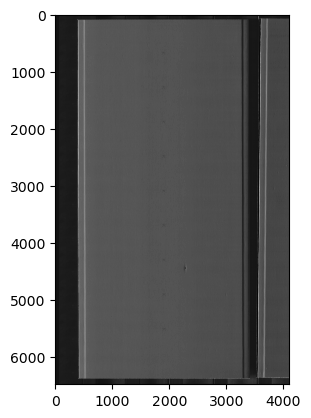

In [4]:
img = cv2.imread(f'camera1/{photos[0]}', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

In [5]:
img.shape

(6484, 4096)

True

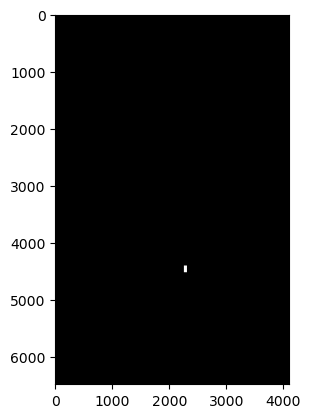

In [6]:
mask = np.zeros_like(img)
# mask = cv2.rectangle(mask,(4407, 2255), (4525, 2309), 
#               thickness=-1,
#              color = (255,255,255))

mask[4407:4525, 2255:2309] = 255


plt.imshow(mask, cmap='gray')
cv2.imwrite(f'masks/{photos[0]}', mask)

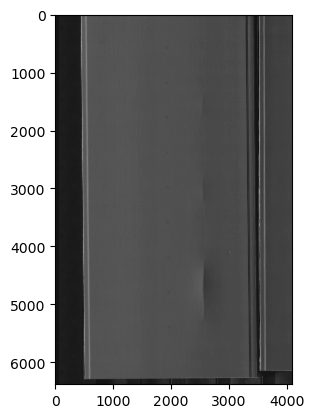

In [7]:
img = cv2.imread(f'camera1/{photos[1]}', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

True

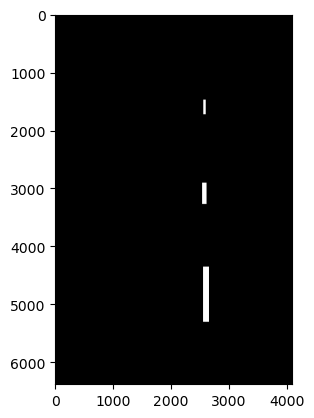

In [8]:
mask = np.zeros_like(img)
# mask = cv2.rectangle(mask,(4356, 2549), (5308, 2650), 255, -1)

mask[4356:5308, 2549:2650] = 255
mask[2908:3276, 2533:2608] = 255
mask[1476:1729, 2553:2593] = 255

plt.imshow(mask, cmap='gray')
cv2.imwrite(f'masks/{photos[1]}', mask)

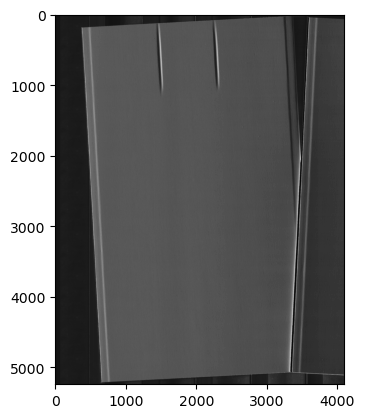

In [9]:
img = cv2.imread(f'camera1/{photos[2]}', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

True

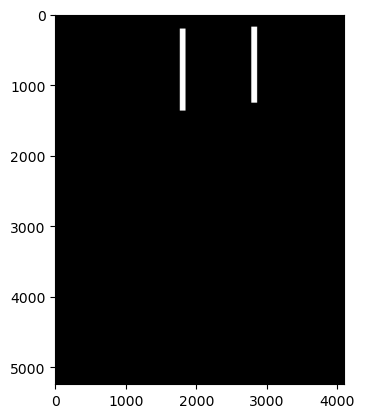

In [10]:
mask = np.zeros_like(img)
mask[206:1368, 1769:1850] = 255
mask[179:1256, 2782:2865] = 255
plt.imshow(mask, cmap='gray')
cv2.imwrite(f'masks/{photos[2]}', mask)

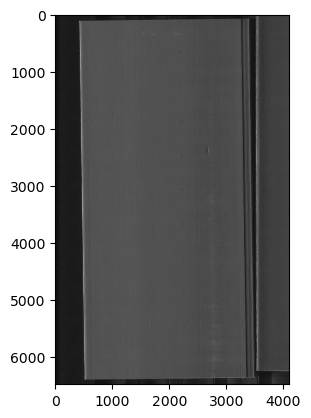

In [11]:
img = cv2.imread(f'camera1/{photos[3]}', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

True

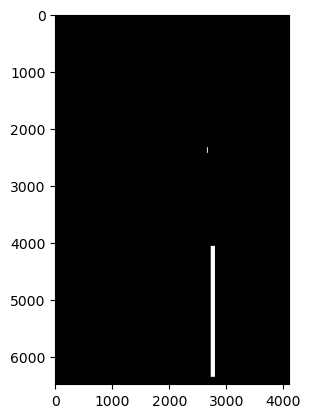

In [12]:
mask = np.zeros_like(img)
mask[2330:2432, 2658:2674] = 255
mask[4059:6352, 2725:2800] = 255
plt.imshow(mask, cmap='gray')
cv2.imwrite(f'masks/{photos[3]}', mask)

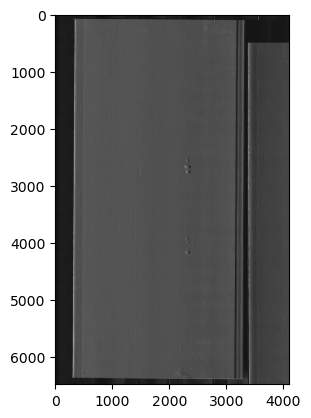

In [13]:
img = cv2.imread(f'camera1/{photos[4]}', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

True

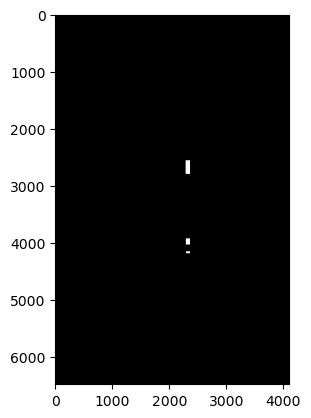

In [14]:
mask = np.zeros_like(img)
mask[2560:2800, 2286:2364] = 255
mask[3928:4036, 2289:2364] = 255
mask[4154:4188, 2296:2364] = 255
plt.imshow(mask, cmap='gray')
cv2.imwrite(f'masks/{photos[4]}', mask)

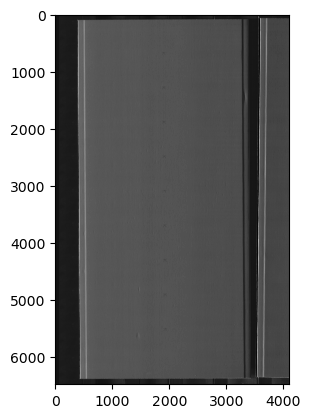

In [15]:
img = cv2.imread(f'camera1/{photos[5]}', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

True

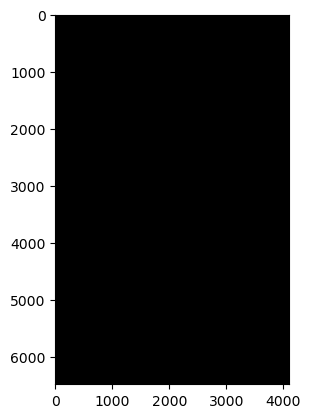

In [16]:
mask = np.zeros_like(img)

plt.imshow(mask, cmap='gray')
cv2.imwrite(f'masks/{photos[5]}', mask)

## Camera 2

In [17]:
mypath = './camera2/'
photos = [f for f in listdir(mypath) if isfile(join(mypath, f))]
photos

['no-defects-13_56_04-18.01.2023.png',
 'no-defects-14_40_18-13.12.2022.png',
 'no-defects-14_29_14-29.11.2022.png',
 'no-defects-14_29_21-29.11.2022 (1).png',
 'no-defects-14_40_21-13.12.2022.png',
 'no-defects-14_41_53-13.12.2022.png']

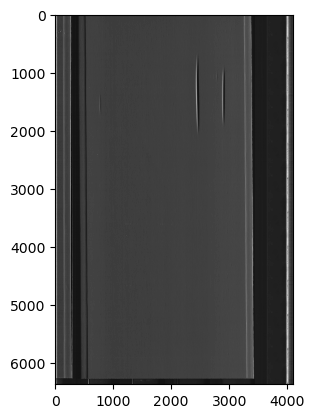

In [18]:
img = cv2.imread(f'camera2/{photos[0]}', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

True

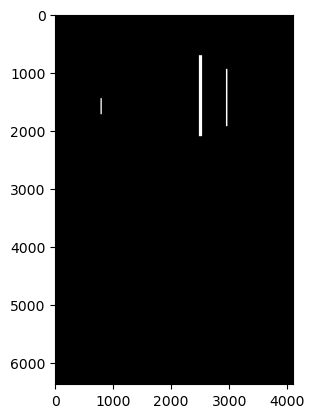

In [19]:
mask = np.zeros_like(img)
mask[709:2104, 2475:2533] = 255
mask[946:1932, 2941:2968] = 255
mask[1449:1726, 783:804] = 255
plt.imshow(mask, cmap='gray')
cv2.imwrite(f'masks/{photos[0]}', mask)

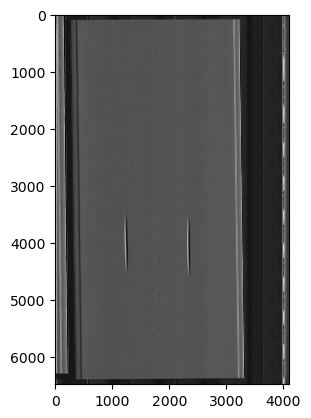

In [20]:
img = cv2.imread(f'camera2/{photos[1]}', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

True

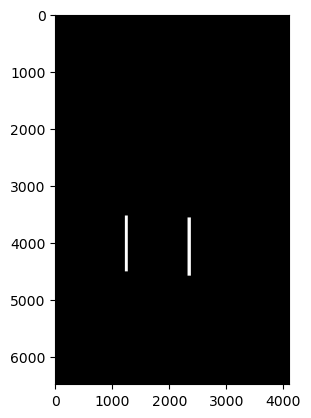

In [21]:
mask = np.zeros_like(img)
mask[3529:4508, 1222:1273] = 255
mask[3563:4583, 2320:2377] = 255
plt.imshow(mask, cmap='gray')
cv2.imwrite(f'masks/{photos[1]}', mask)

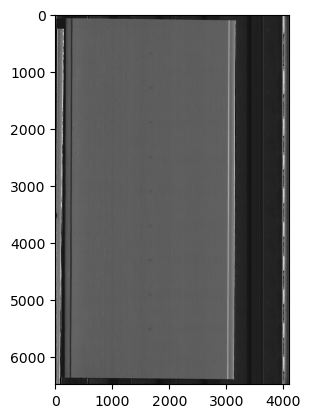

In [22]:
img = cv2.imread(f'camera2/{photos[2]}', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

True

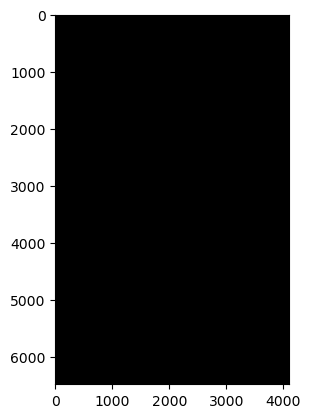

In [23]:
mask = np.zeros_like(img)

plt.imshow(mask, cmap='gray')
cv2.imwrite(f'masks/{photos[2]}', mask)

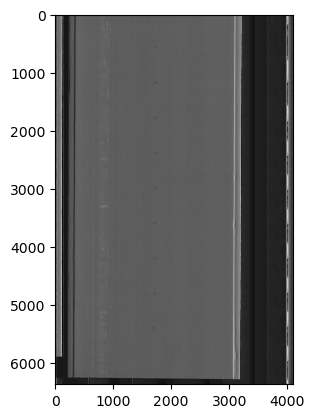

In [24]:
img = cv2.imread(f'camera2/{photos[3]}', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

True

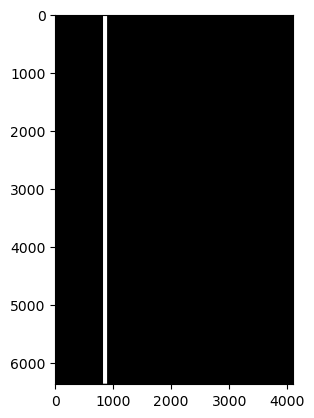

In [25]:
mask = np.zeros_like(img)
mask[7:6369, 827:898] = 255
plt.imshow(mask, cmap='gray')
cv2.imwrite(f'masks/{photos[3]}', mask)

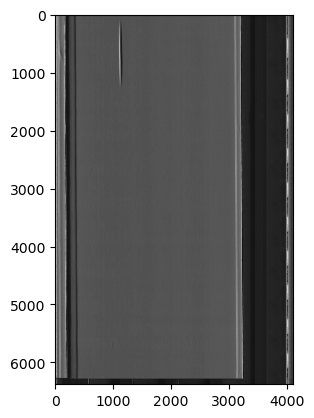

In [26]:
img = cv2.imread(f'camera2/{photos[4]}', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

True

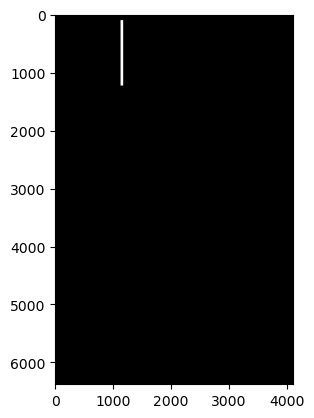

In [27]:
mask = np.zeros_like(img)
mask[105:1233, 1128:1175] = 255
plt.imshow(mask, cmap='gray')
cv2.imwrite(f'masks/{photos[4]}', mask)

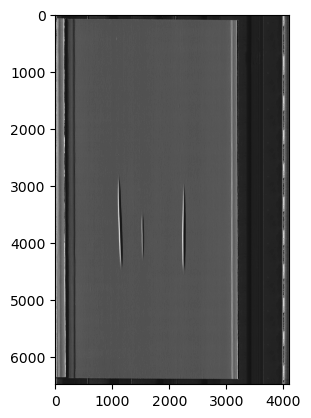

In [28]:
img = cv2.imread(f'camera2/{photos[5]}', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

True

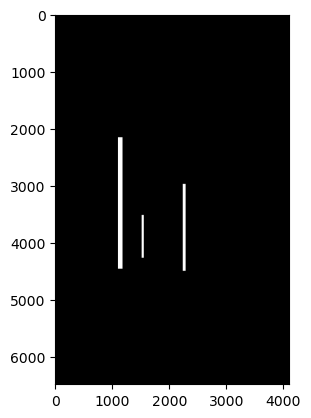

In [29]:
mask = np.zeros_like(img)
mask[2158:4461, 1101:1182] = 255
mask[3519:4269, 1516:1553] = 255
mask[2975:4498, 2235:2286] = 255
plt.imshow(mask, cmap='gray')
cv2.imwrite(f'masks/{photos[5]}', mask)

# Оценка качества

## Average Precision = 0.122

### Метрика -  Average Precision, но к сожалению она не работает корректно, если лист без повреждений, так что эти случаи учитывать не будем. Но чисто для теста посчитаем MAE (я понимаю, что это особо не показатель, тк большая чать фанеры - класс 0)

In [30]:
def compute_ap(mask_true, mask_pred):
    """
    Функция для вычисления Average Precision (AP)
    на основе двух масок (истинной и предсказанной)
    """
    
    # получаем массив значений маски и переводим в 1D формат
    y_true = mask_true.ravel()
    y_pred = mask_pred.ravel()
    
    # вычисляем average precision
    ap = average_precision_score(y_true, y_pred)
    
    return ap

def mean_absolute_error(true_mask, predicted_mask):
    """Вычисляет среднюю абсолютную ошибку между двумя масками"""
    diff = np.abs(true_mask.astype(np.float) - predicted_mask.astype(np.float))
    return np.mean(diff)


In [31]:
mypath = 'camera1/'
photos = [f for f in listdir(mypath) if isfile(join(mypath, f))]
mypath = './camera2/'
photos += [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [32]:
metric = []
for pic in photos:
    img = cv2.imread(f'camera2/{pic}', cv2.IMREAD_GRAYSCALE)
    if img is None:
        img = cv2.imread(f'camera1/{pic}', cv2.IMREAD_GRAYSCALE)
    test_metric = segmentation(img)
    test_metric[test_metric[:,:]==255]= 1
    y_true = cv2.imread(f'masks//{pic}', cv2.IMREAD_GRAYSCALE)
    y_true[y_true[:,:]== 255]=1
    ap = compute_ap(y_true, test_metric)
    if not math.isnan(ap):
        metric.append(ap)
    
print(metric)
np.mean(metric)

[ WARN:0@33.337] imread_('camera2/no-defects-11_30_39-12.12.2022.png'): can't open/read file: check file path/integrity
[ WARN:0@42.693] imread_('camera2/no-defects-11_48_12-20.12.2022.png'): can't open/read file: check file path/integrity
[ WARN:0@51.243] imread_('camera2/no-defects-06_45_22-13.12.2022.png'): can't open/read file: check file path/integrity
[ WARN:0@58.342] imread_('camera2/no-defects-11_46_21-20.12.2022.png'): can't open/read file: check file path/integrity
[ WARN:0@66.993] imread_('camera2/no-defects-11_46_32-20.12.2022.png'): can't open/read file: check file path/integrity
[ WARN:0@75.682] imread_('camera2/no-defects-11_28_32-12.12.2022.png'): can't open/read file: check file path/integrity


[0.025138172467119402, 0.00936273789551127, 0.008545122302716968, 0.007126170032484946, 0.04883034929063288, 0.05606700476085808, 0.35184268981786415, 0.018012261608903297, 0.32195048352417766, 0.3741033064204353]


0.1220978298120704

In [33]:
metric = []
for pic in photos:
    img = cv2.imread(f'camera2/{pic}', cv2.IMREAD_GRAYSCALE)
    if img is None:
        img = cv2.imread(f'camera1/{pic}', cv2.IMREAD_GRAYSCALE)
    test_metric = segmentation(img)
    test_metric[test_metric[:,:]==255]= 1
    y_true = cv2.imread(f'masks//{pic}', cv2.IMREAD_GRAYSCALE)
    y_true[y_true[:,:]== 255]=1
    mae = mean_absolute_error(y_true, test_metric)
    
    metric.append(mae)
    
print(metric)
np.mean(metric)

[ WARN:0@135.316] imread_('camera2/no-defects-11_30_39-12.12.2022.png'): can't open/read file: check file path/integrity
[ WARN:0@142.347] imread_('camera2/no-defects-11_48_12-20.12.2022.png'): can't open/read file: check file path/integrity
[ WARN:0@150.333] imread_('camera2/no-defects-06_45_22-13.12.2022.png'): can't open/read file: check file path/integrity
[ WARN:0@156.589] imread_('camera2/no-defects-11_46_21-20.12.2022.png'): can't open/read file: check file path/integrity
[ WARN:0@164.414] imread_('camera2/no-defects-11_46_32-20.12.2022.png'): can't open/read file: check file path/integrity
[ WARN:0@172.049] imread_('camera2/no-defects-11_28_32-12.12.2022.png'): can't open/read file: check file path/integrity


[0.0021242945375154225, 0.006352094474808024, 0.015782526613191794, 0.007489441426752084, 0.0021974540632718432, 0.0011113049273098873, 0.009792057925035305, 0.0045441949906457335, 0.003157142796879821, 0.019082497009334797, 0.0030244269240945437, 0.00815695639176053]


0.006901199340049982

[ WARN:0@482.963] imread_('camera2/no-defects-11_30_39-12.12.2022.png'): can't open/read file: check file path/integrity
[ WARN:0@489.578] imread_('camera2/no-defects-11_48_12-20.12.2022.png'): can't open/read file: check file path/integrity
[ WARN:0@496.298] imread_('camera2/no-defects-06_45_22-13.12.2022.png'): can't open/read file: check file path/integrity
[ WARN:0@501.814] imread_('camera2/no-defects-11_46_21-20.12.2022.png'): can't open/read file: check file path/integrity
[ WARN:0@508.569] imread_('camera2/no-defects-11_46_32-20.12.2022.png'): can't open/read file: check file path/integrity
[ WARN:0@515.404] imread_('camera2/no-defects-11_28_32-12.12.2022.png'): can't open/read file: check file path/integrity


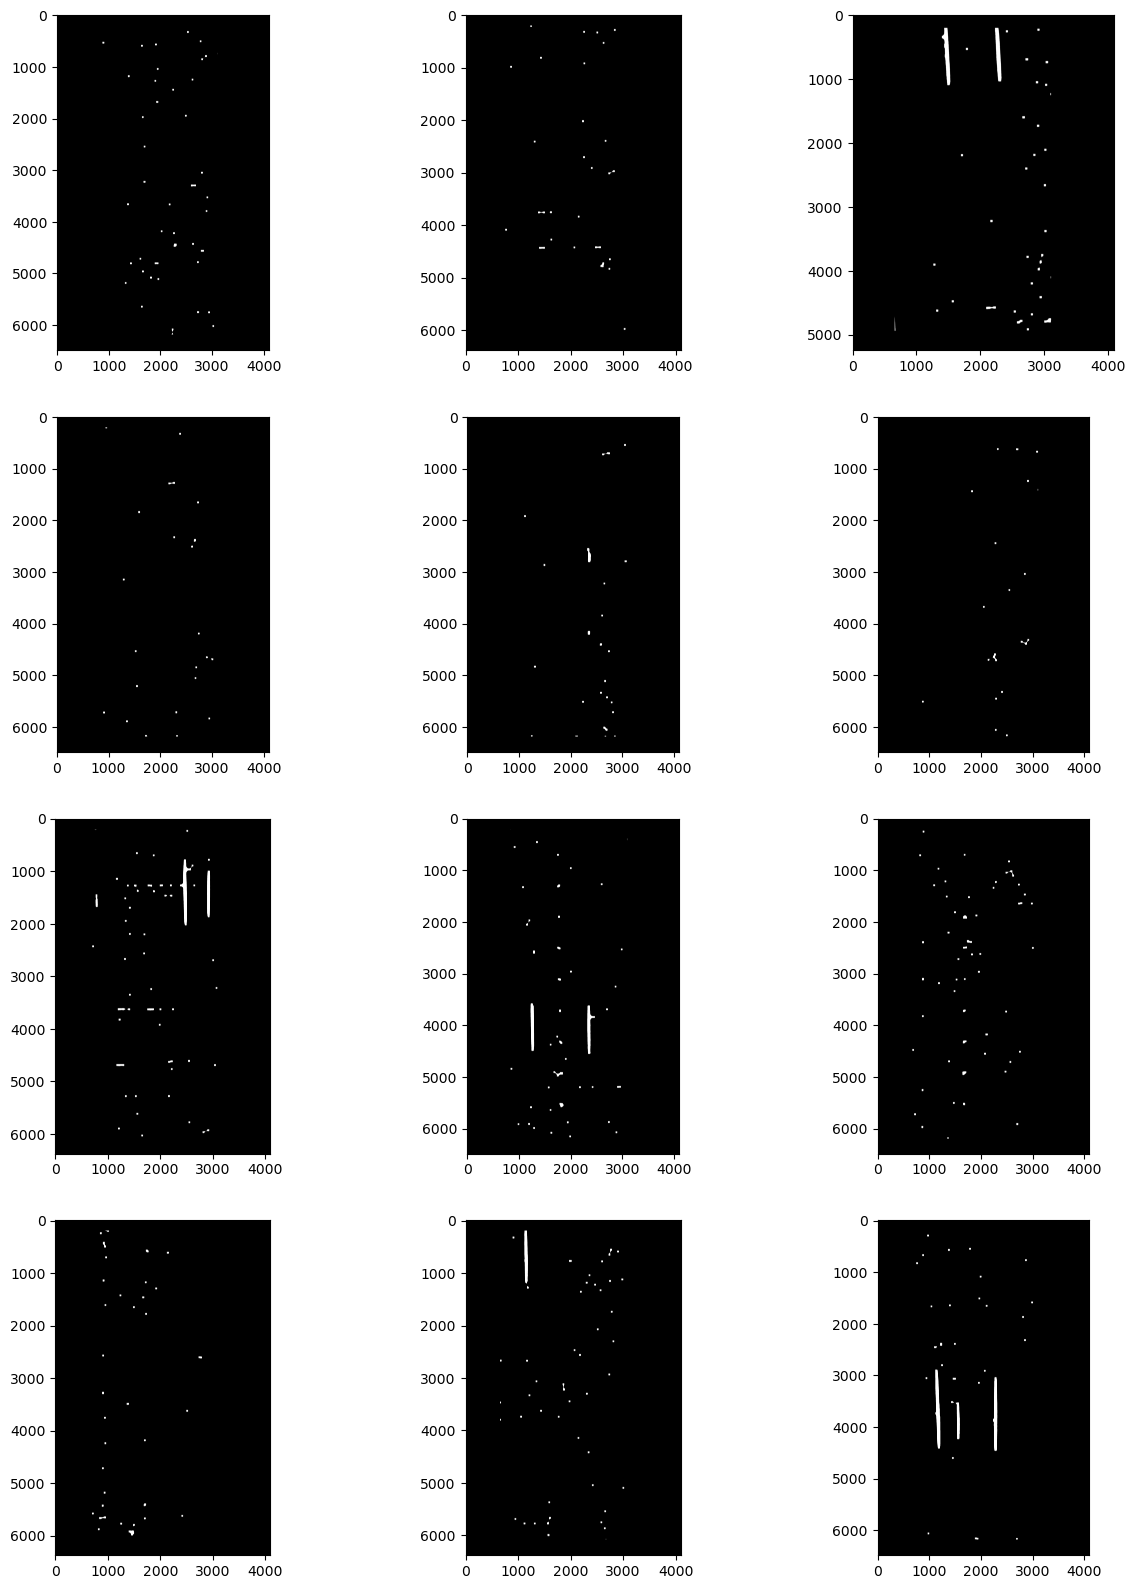

In [38]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

axs = axs.flatten()
for i, path in enumerate(photos):
    img = cv2.imread(f'camera2/{path}', cv2.IMREAD_GRAYSCALE)
    if img is None:
        img = cv2.imread(f'camera1/{path}', cv2.IMREAD_GRAYSCALE)
        
    test_metric = segmentation(img)
    axs[i].imshow(test_metric, cmap='gray')
    
plt.show()

### Ниже остатки от построения модели

In [36]:
photos

['no-defects-11_30_39-12.12.2022.png',
 'no-defects-11_48_12-20.12.2022.png',
 'no-defects-06_45_22-13.12.2022.png',
 'no-defects-11_46_21-20.12.2022.png',
 'no-defects-11_46_32-20.12.2022.png',
 'no-defects-11_28_32-12.12.2022.png',
 'no-defects-13_56_04-18.01.2023.png',
 'no-defects-14_40_18-13.12.2022.png',
 'no-defects-14_29_14-29.11.2022.png',
 'no-defects-14_29_21-29.11.2022 (1).png',
 'no-defects-14_40_21-13.12.2022.png',
 'no-defects-14_41_53-13.12.2022.png']

In [47]:
metric.pop(8)
metric.pop(5)
np.mean(metric)

0.1220978298120704

In [46]:
photos[5]

'no-defects-11_28_32-12.12.2022.png'

In [126]:
photos[5]

'no-defects-14_41_53-13.12.2022.png'

0

In [11]:
mypath = './camera1/'
photos = [f for f in listdir(mypath) if isfile(join(mypath, f))]
photos

['no-defects-11_30_39-12.12.2022.png',
 'no-defects-11_48_12-20.12.2022.png',
 'no-defects-06_45_22-13.12.2022.png',
 'no-defects-11_46_21-20.12.2022.png',
 'no-defects-11_46_32-20.12.2022.png',
 'no-defects-11_28_32-12.12.2022.png']

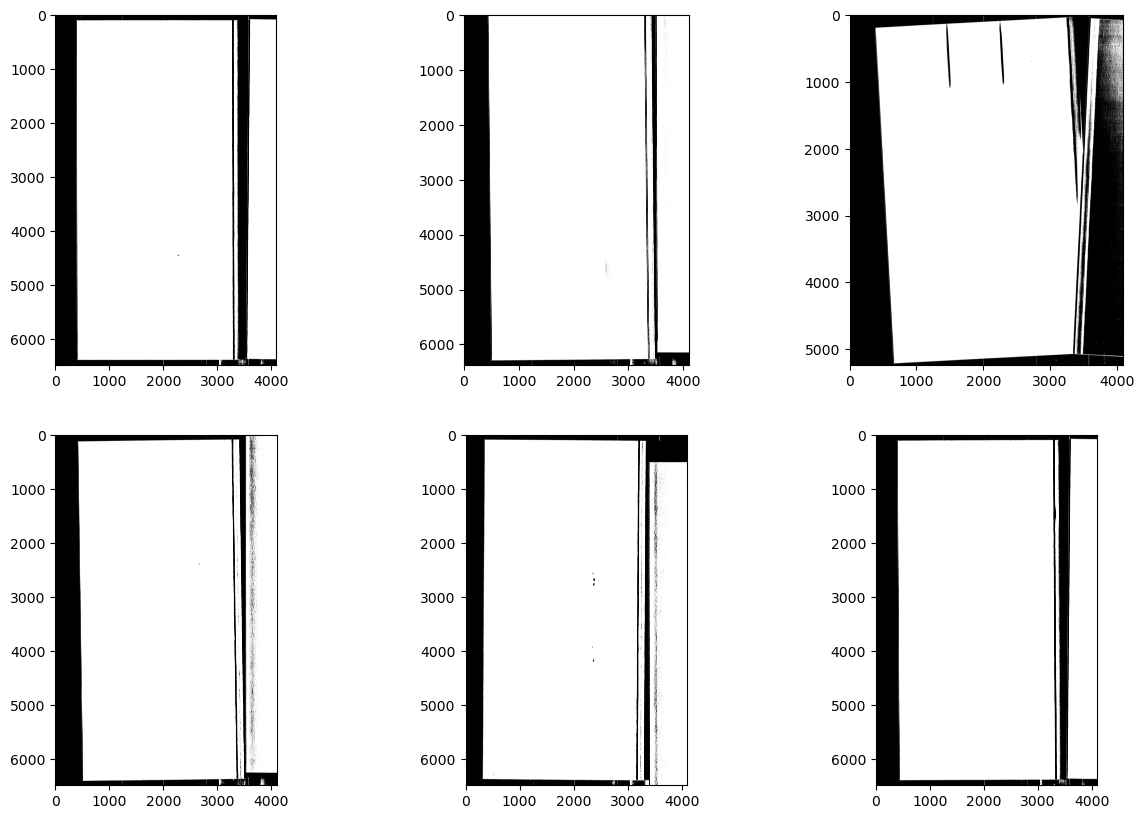

In [21]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axs = axs.flatten()
for i, path in enumerate(photos):
    img = cv2.imread(f'camera1/{path}', cv2.IMREAD_GRAYSCALE)
    
    ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    axs[i].imshow(thresh, cmap='gray')
    
plt.show()

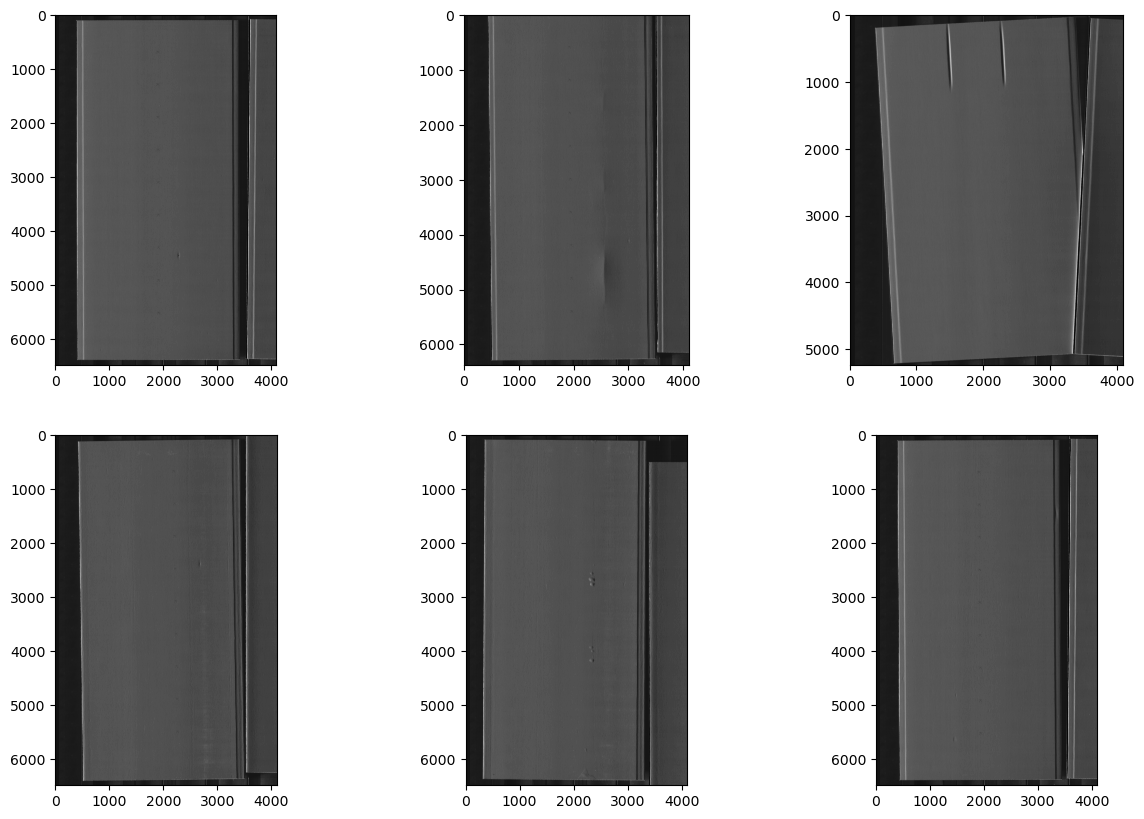

In [22]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axs = axs.flatten()
for i, path in enumerate(photos):
    img = cv2.imread(f'camera1/{path}', cv2.IMREAD_GRAYSCALE)
    
    axs[i].imshow(img, cmap='gray')
    
plt.show()

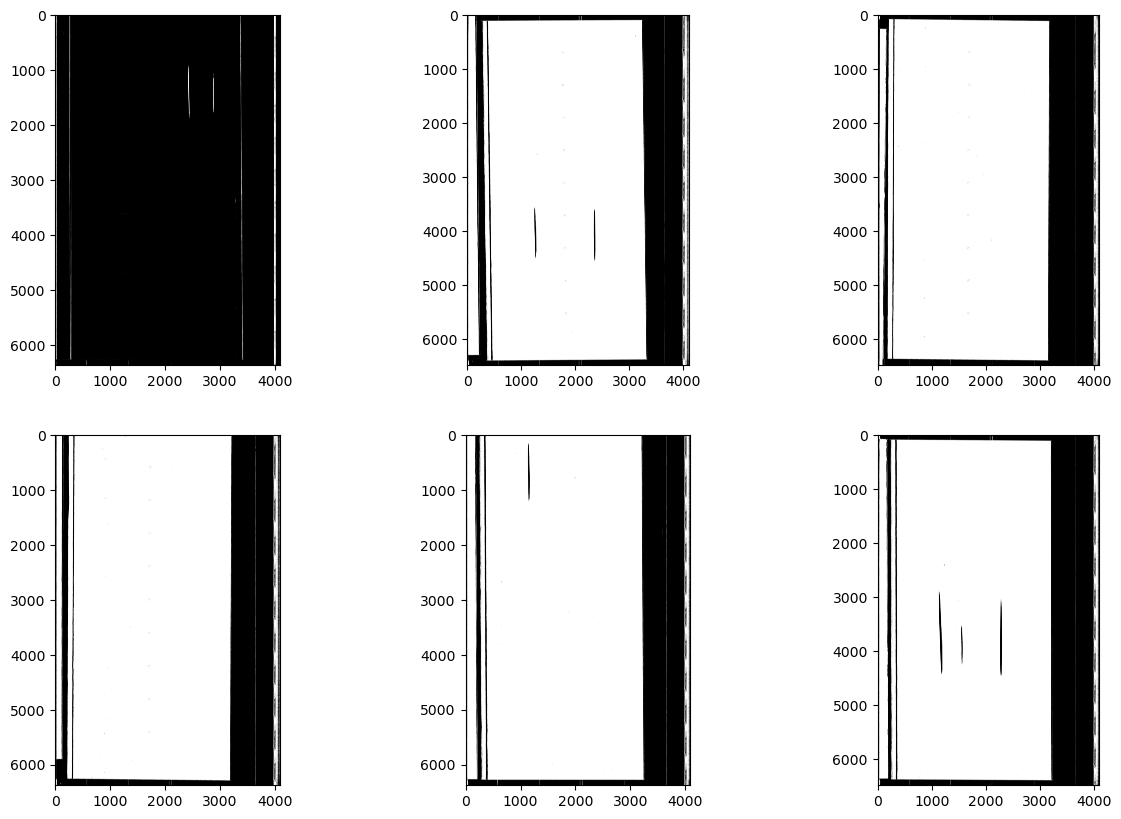

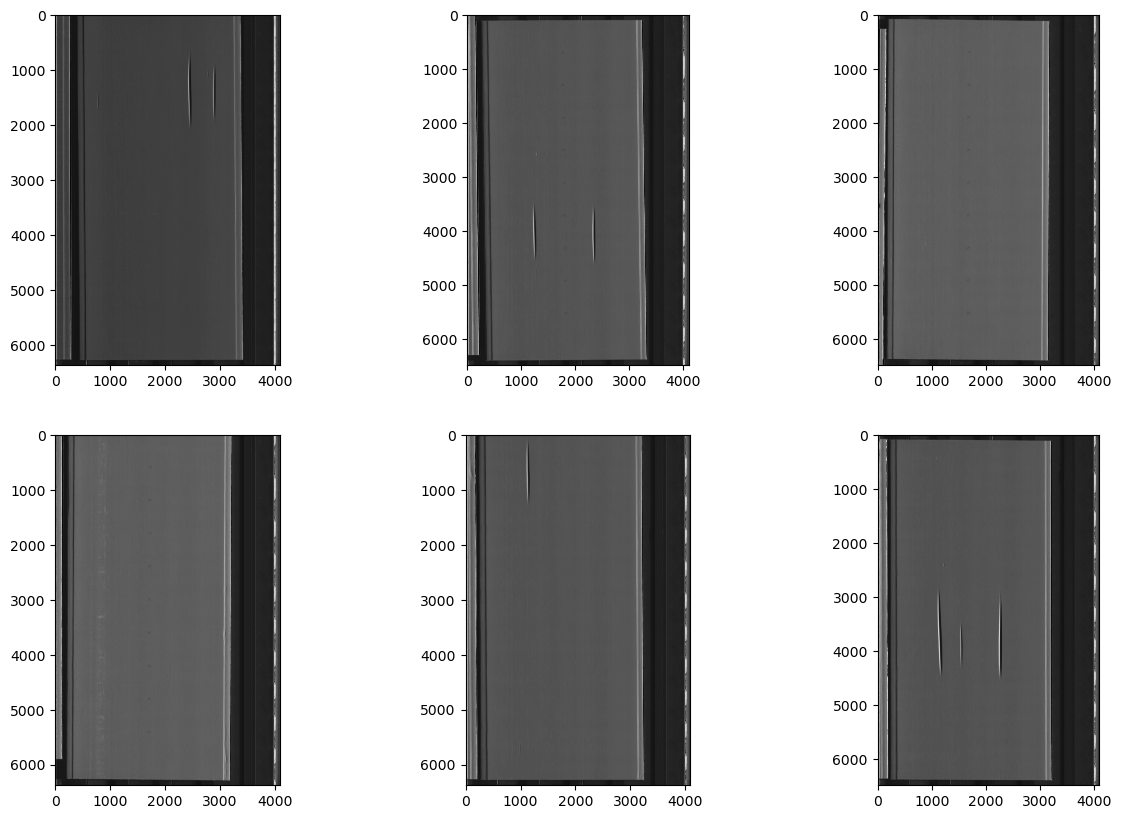

In [24]:
mypath = './camera2/'
photos = [f for f in listdir(mypath) if isfile(join(mypath, f))]
#photos

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axs = axs.flatten()
for i, path in enumerate(photos):
    img = cv2.imread(f'camera2/{path}', cv2.IMREAD_GRAYSCALE)
    
    ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    axs[i].imshow(thresh, cmap='gray')
    
plt.show()

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axs = axs.flatten()
for i, path in enumerate(photos):
    img = cv2.imread(f'camera2/{path}', cv2.IMREAD_GRAYSCALE)
    
    axs[i].imshow(img, cmap='gray')
    
plt.show()

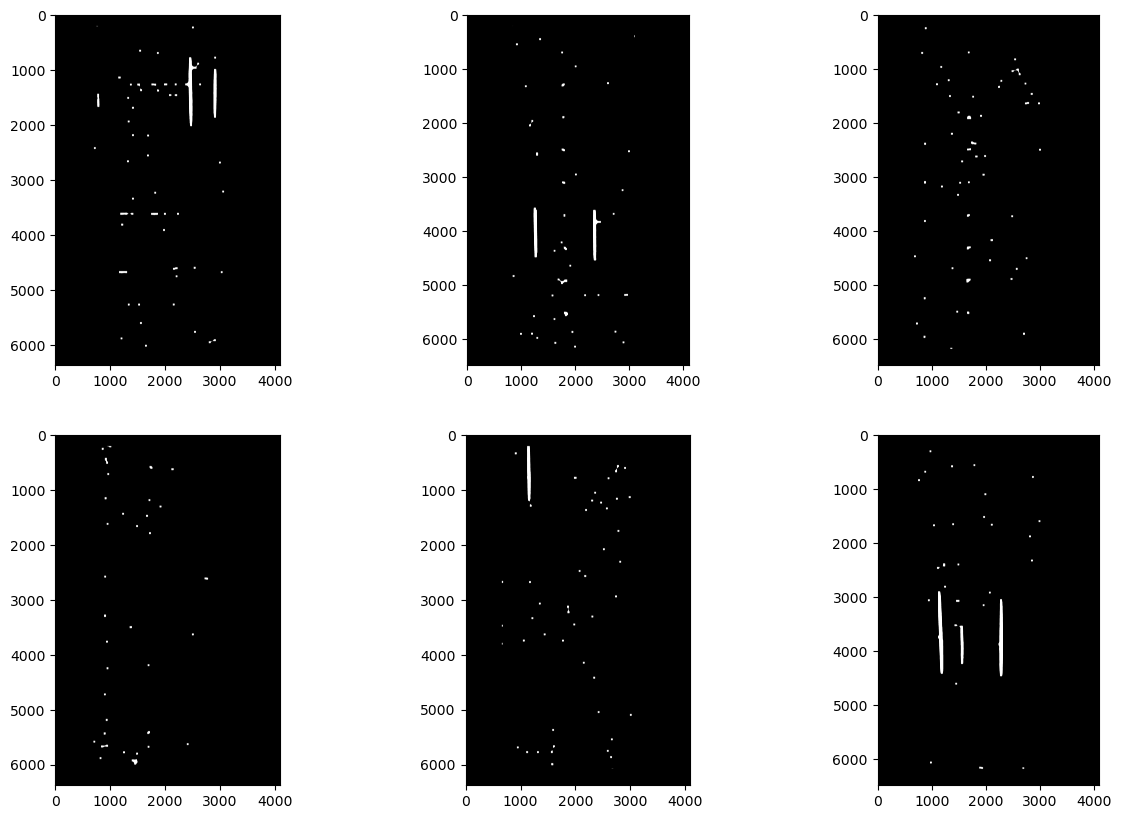

In [242]:
mypath = './camera2/'
photos = [f for f in listdir(mypath) if isfile(join(mypath, f))]

#photos

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axs = axs.flatten()
for i, path in enumerate(photos):
    img = cv2.imread(f'camera2/{path}', cv2.IMREAD_GRAYSCALE)
   
    result = segmentation(img)
    
    axs[i].imshow(result, cmap='gray')
    
plt.show()

3195


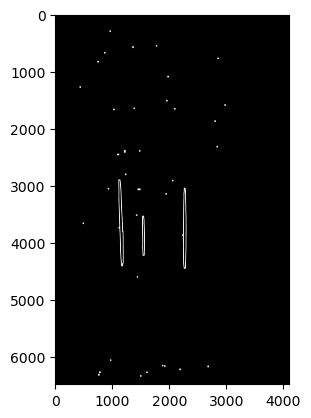

In [159]:
img = cv2.imread('camera2/no-defects-14_41_53-13.12.2022.png', cv2.IMREAD_GRAYSCALE)
result = segmentation(img)
plt.imshow(result, cmap='gray')

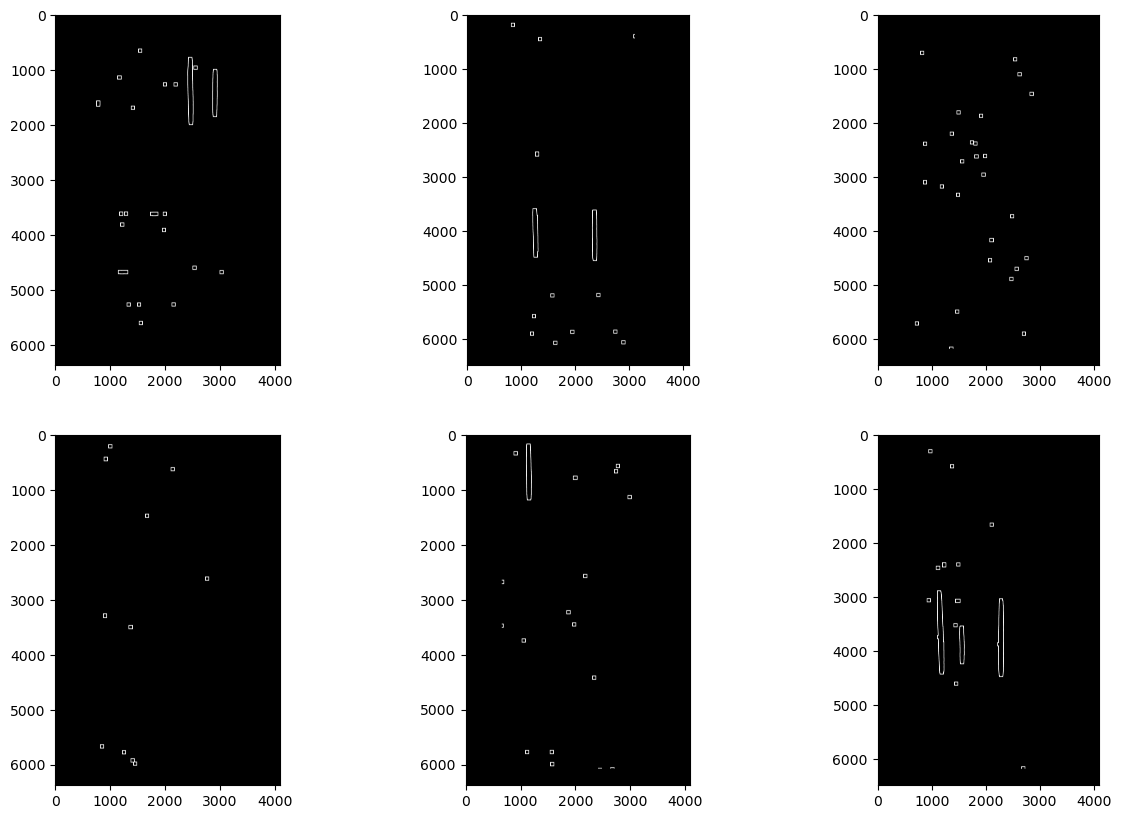

In [203]:
mypath = './camera2/'
photos = [f for f in listdir(mypath) if isfile(join(mypath, f))]

#photos

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axs = axs.flatten()
for i, path in enumerate(photos):
    img = cv2.imread(f'camera2/{path}', cv2.IMREAD_GRAYSCALE)
   
    result = segmentation(img)
    
    axs[i].imshow(result, cmap='gray')
    
plt.show()

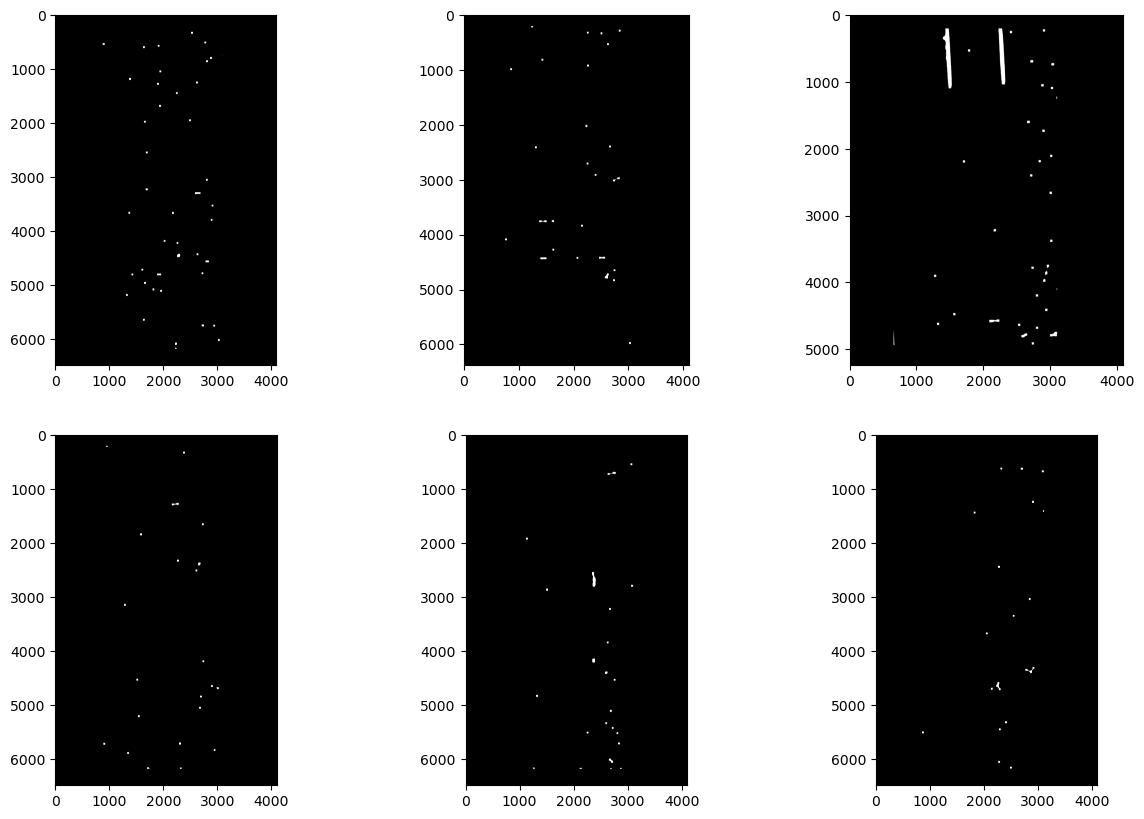

In [243]:
mypath = './camera1/'
photos = [f for f in listdir(mypath) if isfile(join(mypath, f))]

#photos

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axs = axs.flatten()
for i, path in enumerate(photos):
    img = cv2.imread(f'camera1/{path}', cv2.IMREAD_GRAYSCALE)
   
    result = segmentation(img)
    
    axs[i].imshow(result, cmap='gray')
    
plt.show()

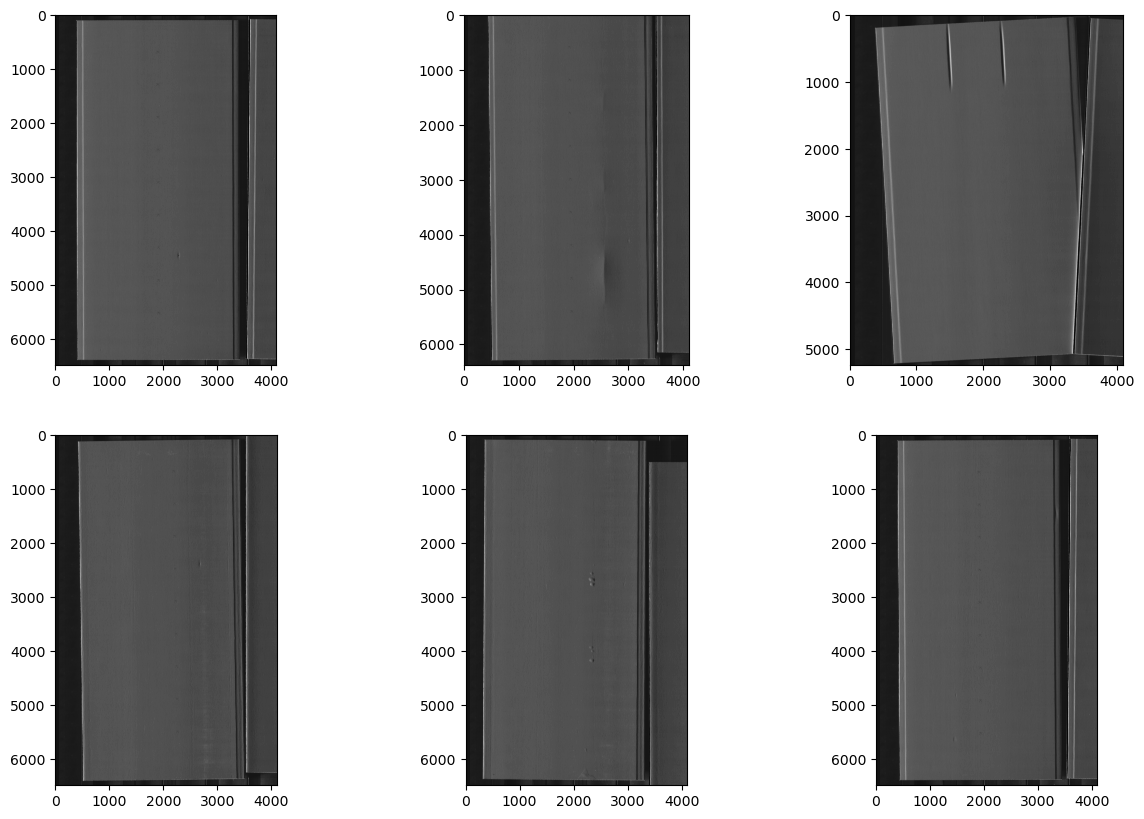

In [206]:
mypath = './camera1/'
photos = [f for f in listdir(mypath) if isfile(join(mypath, f))]

#photos

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axs = axs.flatten()
for i, path in enumerate(photos):
    img = cv2.imread(f'camera1/{path}', cv2.IMREAD_GRAYSCALE)
    
    
    axs[i].imshow(img, cmap='gray')
    
plt.show()

In [153]:
img.shape

(6481, 4096)